# Genesis Token Distribution

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import itertools
import re
import json

In [188]:
data = []

with open('data/data.json') as json_file:

    file = json.load(json_file)

    for line in file:
        output = {}

        output["name"] = line['name']
        output["Relay chain"] = line['relay_chain']
        output["Market supply"] = line['market_supply']
        output["Circulation supply"] = line['circulation_supply']
        output["Market cap"] = line['market_cap']

        for k in line["token_distribution"]:
            output[k[0]] = k[1]

        data.append(output)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,tokenomics,Auction&Liquidity,EcosystemDev,FoundationReserver,Backers,...,AuctionIncentives,PCXHolders,CIDNFTMining,Council,Giveaway,Incubator&Advisor,Treasure&Reserves,Ecosystem&DevCommunity,ProtocolReserve,StrategicPartners&Advisors
0,Dora Factory,Kusama,0,0,0,0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,119468926,current,34.0,5.0,10.76,11.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Astar,Polkadot,7000000000,3889282576,185154373,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Shiden Network,Kusama,70000000,53223277,15404535,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pichiu,Kusama,10500000105,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Bifrost Polkadot,Polkadot,80000000,12142000,2821123,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Equilibrium,Polkadot,1100000000917,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Genshiro,Kusama,1200000000,8175227,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Nodle,Polkadot,850000000405,0,0,current,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Parallel Finance,Polkadot,1250000000125,0,0,current,0.0,15.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
subcategories_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap
0,Dora Factory,Kusama,0,0,0
1,Acala,Polkadot,1000000000,437461795,119468926
2,Astar,Polkadot,7000000000,3889282576,185154373
3,Shiden Network,Kusama,70000000,53223277,15404535
4,Pichiu,Kusama,10500000105,0,0
5,Bifrost Polkadot,Polkadot,80000000,12142000,2821123
6,Equilibrium,Polkadot,1100000000917,0,0
7,Genshiro,Kusama,1200000000,8175227,0
8,Nodle,Polkadot,850000000405,0,0
9,Parallel Finance,Polkadot,1250000000125,0,0


# Filter out the categories in the new categories list

In [190]:
categories = pd.read_csv('data/categories.csv')

print(categories)

                  Scraped Label   Category   Subcategory
0                  EcosystemDev    Budgets     Ecosystem
1            FoundationReserver    Reserve       Reserve
2                       Backers  Investors  Second Round
3                  FoundingTeam   Founders      Founders
4                  EarlyBackers  Investors    Seed Round
..                          ...        ...           ...
257                     Council   Founders      Founders
258                    Giveaway    Budgets     Ecosystem
259           Treasure&Reserves    Reserve       Reserve
260             ProtocolReserve    Reserve       Reserve
261  StrategicPartners&Advisors  Investors  Second Round

[262 rows x 3 columns]


In [191]:
categories["Subcategory"].unique()

array(['Ecosystem', 'Reserve', 'Second Round', 'Founders', 'Seed Round',
       'Crowdloan', 'Auctions', 'Community', 'Marketing', 'Liquidity',
       'Developers'], dtype=object)

In [192]:
for Subcategory in categories["Subcategory"].unique():
  subcategories_df[Subcategory] = 0

subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,119468926,0,0,0,0,0,0,0,0,0,0,0
2,Astar,Polkadot,7000000000,3889282576,185154373,0,0,0,0,0,0,0,0,0,0,0
3,Shiden Network,Kusama,70000000,53223277,15404535,0,0,0,0,0,0,0,0,0,0,0
4,Pichiu,Kusama,10500000105,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bifrost Polkadot,Polkadot,80000000,12142000,2821123,0,0,0,0,0,0,0,0,0,0,0
6,Equilibrium,Polkadot,1100000000917,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Genshiro,Kusama,1200000000,8175227,0,0,0,0,0,0,0,0,0,0,0,0
8,Nodle,Polkadot,850000000405,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Parallel Finance,Polkadot,1250000000125,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
# Populate the dataframe with the respective values
for index, row  in categories.iterrows():
  try:
    subcategories_df[row["Subcategory"]] += df[row["Scraped Label"]]
  except:
    continue


subcategories_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,119468926,5.0,10.76,11.66,20.25,18.33,0.0,0.0,0.0,0.0,0.0,0.0
2,Astar,Polkadot,7000000000,3889282576,185154373,30.0,15.00,0.00,5.00,10.00,0.0,25.0,0.0,5.0,0.0,10.0
3,Shiden Network,Kusama,70000000,53223277,15404535,30.0,5.00,0.00,5.00,10.00,0.0,35.0,0.0,5.0,0.0,10.0
4,Pichiu,Kusama,10500000105,0,0,0.0,0.00,0.00,0.00,0.00,30.0,10.0,20.0,20.0,10.0,10.0
5,Bifrost Polkadot,Polkadot,80000000,12142000,2821123,34.5,10.00,5.00,20.00,10.00,17.5,0.0,0.0,3.0,0.0,0.0
6,Equilibrium,Polkadot,1100000000917,0,0,0.0,35.00,0.00,15.00,5.00,10.0,0.0,25.0,0.0,10.0,0.0
7,Genshiro,Kusama,1200000000,8175227,0,0.0,15.00,0.00,0.00,0.00,20.0,0.0,50.0,0.0,15.0,0.0
8,Nodle,Polkadot,850000000405,0,0,60.0,12.00,12.00,10.00,4.50,0.0,0.0,0.0,0.0,0.0,1.5
9,Parallel Finance,Polkadot,1250000000125,0,0,20.0,0.00,15.00,20.00,5.00,15.0,0.0,0.0,0.0,25.0,0.0


# Populating the special categories

In [194]:
# Auction&Liquidity
subcategories_df["Auctions"] += df["Auction&Liquidity"]/2
subcategories_df["Liquidity"] += df["Auction&Liquidity"]/2

# ParachainandEcosystem
subcategories_df["Crowdloan"] += df["ParachainandEcosystem"]/2
subcategories_df["Ecosystem"] += df["ParachainandEcosystem"]/2

# Marketing,Ecosystem&Partnerships
subcategories_df["Marketing"] += df["Marketing,Ecosystem&Partnerships"]/2
subcategories_df["Ecosystem"] += df["Marketing,Ecosystem&Partnerships"]/2

# Development&Marketing
subcategories_df["Developers"] += df["Development&Marketing"]/2
subcategories_df["Marketing"] += df["Development&Marketing"]/2

# MarketingAndEcosystem
subcategories_df["Marketing"] += df["MarketingAndEcosystem"]/2
subcategories_df["Ecosystem"] += df["MarketingAndEcosystem"]/2

# EcosystemandCommunity
subcategories_df["Ecosystem"] += df["EcosystemandCommunity"]/2
subcategories_df["Community"] += df["MarketingAndEcosystem"]/2

# Incubator&Advisor
subcategories_df["Seed Round"] += df["Incubator&Advisor"]/2
subcategories_df["Founders"] += df["Incubator&Advisor"]/2

# Ecosystem&DevCommunity
subcategories_df["Ecosystem"] += df["Ecosystem&DevCommunity"]/2
subcategories_df["Community"] += df["Ecosystem&DevCommunity"]/2


subcategories_df.head(10)
subcategories_df.to_csv('data/export_subcategories.csv')

# Data Analysis

In [195]:
categorized_df = df[['name', 'Relay chain','Market supply', 'Circulation supply', 'Market cap']].copy()

for cat in categories["Category"].unique():
  categorized_df[cat] = 0

categorized_df.head(10)

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,119468926,0,0,0,0,0,0
2,Astar,Polkadot,7000000000,3889282576,185154373,0,0,0,0,0,0
3,Shiden Network,Kusama,70000000,53223277,15404535,0,0,0,0,0,0
4,Pichiu,Kusama,10500000105,0,0,0,0,0,0,0,0
5,Bifrost Polkadot,Polkadot,80000000,12142000,2821123,0,0,0,0,0,0
6,Equilibrium,Polkadot,1100000000917,0,0,0,0,0,0,0,0
7,Genshiro,Kusama,1200000000,8175227,0,0,0,0,0,0,0
8,Nodle,Polkadot,850000000405,0,0,0,0,0,0,0,0
9,Parallel Finance,Polkadot,1250000000125,0,0,0,0,0,0,0,0


In [196]:
categories[ categories["Category"] == "Budgets"]["Subcategory"].unique()

array(['Ecosystem', 'Community', 'Marketing', 'Developers'], dtype=object)

In [197]:
for cat in categories["Category"].unique():
  for subcat in categories[ categories["Category"] == cat]["Subcategory"].unique():
    categorized_df[cat] += subcategories_df[subcat]

categorized_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity
0,Dora Factory,Kusama,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
1,Acala,Polkadot,1000000000,437461795,119468926,5.0,10.76,29.99,20.25,17.0,17.0
2,Astar,Polkadot,7000000000,3889282576,185154373,45.0,15.00,10.00,5.00,25.0,0.0
3,Shiden Network,Kusama,70000000,53223277,15404535,45.0,5.00,10.00,5.00,35.0,0.0
4,Pichiu,Kusama,10500000105,0,0,50.0,0.00,0.00,0.00,40.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
159,Shift,Polkadot,9679780,8207,9679780,0.0,0.00,0.00,0.00,0.0,0.0
160,Hazel,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
161,Wiv,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0
162,Polimec,Polkadot,0,0,0,0.0,0.00,0.00,0.00,0.0,0.0


# Scores

In [198]:
cat_mean = {}
cat_mean_total = 0

subcat_mean = {}
subcat_mean_total = 0

kusama_cat_mean = {}
kusama_cat_mean_total = 0
kusama_subcat_mean = {}
kusama_subcat_mean_total = 0

polkadot_cat_mean = {}
polkadot_cat_mean_total = 0
polkadot_subcat_mean = {}
polkadot_subcat_mean_total = 0

for cat in categories['Category'].unique():
  # Global
  cat_mean[cat] = categorized_df[cat].mean()
  cat_mean_total += cat_mean[cat]

  # Kusama
  kusama_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Kusama'][cat].mean()
  kusama_cat_mean_total += kusama_cat_mean[cat]

  # Polkadot
  polkadot_cat_mean[cat] = categorized_df[categorized_df['Relay chain'] == 'Polkadot'][cat].mean()
  polkadot_cat_mean_total += polkadot_cat_mean[cat]

for subcat in categories['Subcategory'].unique():
  # Global
  subcat_mean[subcat] = subcategories_df[subcat].mean()
  subcat_mean_total += subcat_mean[subcat]

  # Kusama
  kusama_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Kusama'][subcat].mean()
  kusama_subcat_mean_total += kusama_subcat_mean[subcat]

  # Polkadot
  polkadot_subcat_mean[subcat] = subcategories_df[subcategories_df['Relay chain'] == 'Polkadot'][subcat].mean()
  polkadot_subcat_mean_total += polkadot_subcat_mean[subcat]


for item in cat_mean:
  cat_mean[item] = (cat_mean[item]/cat_mean_total) * 100
  kusama_cat_mean[item] = (kusama_cat_mean[item]/kusama_cat_mean_total) * 100
  polkadot_cat_mean[item] = (polkadot_cat_mean[item]/polkadot_cat_mean_total) * 100

for item in subcat_mean:
  subcat_mean[item] = (subcat_mean[item]/subcat_mean_total) * 100
  kusama_subcat_mean[item] = (kusama_subcat_mean[item]/kusama_subcat_mean_total) * 100
  polkadot_subcat_mean[item] = (polkadot_subcat_mean[item]/polkadot_subcat_mean_total) * 100


## Both relay chains

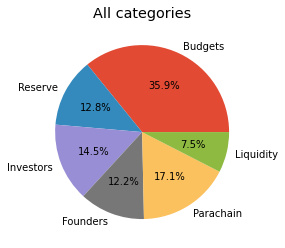

In [199]:
# Data to plot
labels = []
sizes = []

for x, y in cat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All categories')
plt.show()

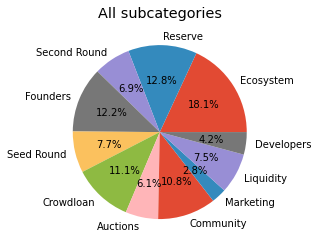

In [200]:
# Data to plot
labels = []
sizes = []

for x, y in subcat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All subcategories')
plt.show()

## Kusama

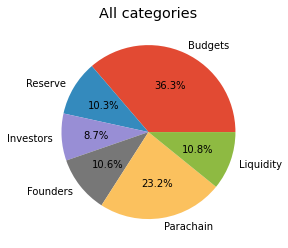

In [201]:
# Data to plot
labels = []
sizes = []

for x, y in kusama_cat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All categories')
plt.show()

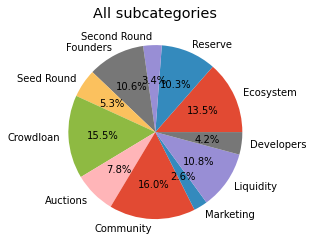

In [202]:
# Data to plot
labels = []
sizes = []

for x, y in kusama_subcat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All subcategories')
plt.show()

## Polkadot

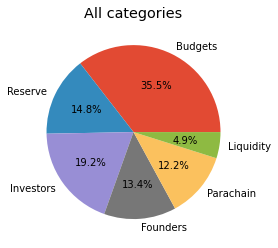

In [203]:
# Data to plot
labels = []
sizes = []

for x, y in polkadot_cat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All categories')
plt.show()

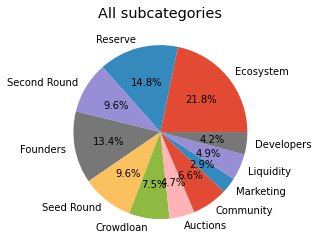

In [204]:
# Data to plot
labels = []
sizes = []

for x, y in polkadot_subcat_mean.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('All subcategories')
plt.show()

# Token valued in USDs

# By category

In [205]:
categorized_token_df = categorized_df
categorized_token_df["Total"] = 0
for cat in categories["Category"].unique():
  categorized_token_df[cat] *=  categorized_token_df["Market cap"].astype(int)/100
  categorized_token_df[cat] = categorized_token_df[cat].astype(int)
  categorized_token_df["Total"] = categorized_token_df[cat].astype(int)

categorized_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Budgets,Reserve,Investors,Founders,Parachain,Liquidity,Total
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,119468926,5973446,12854856,35828730,24192457,20309717,20309717,20309717
2,Astar,Polkadot,7000000000,3889282576,185154373,83319467,27773155,18515437,9257718,46288593,0,0
3,Shiden Network,Kusama,70000000,53223277,15404535,6932040,770226,1540453,770226,5391587,0,0
4,Pichiu,Kusama,10500000105,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Shift,Polkadot,9679780,8207,9679780,0,0,0,0,0,0,0
160,Hazel,Polkadot,0,0,0,0,0,0,0,0,0,0
161,Wiv,Polkadot,0,0,0,0,0,0,0,0,0,0
162,Polimec,Polkadot,0,0,0,0,0,0,0,0,0,0


# By subcategory

In [206]:
subcategories_token_df = subcategories_df
subcategories_token_df["Total"] = 0

for cat in categories["Subcategory"].unique():
  subcategories_token_df[cat] *=  subcategories_token_df["Market cap"].astype(int)/100
  subcategories_token_df[cat] = subcategories_token_df[cat].astype(int)
  subcategories_token_df["Total"] += subcategories_token_df[cat].astype(int)


subcategories_token_df

,name,Relay chain,Market supply,Circulation supply,Market cap,Ecosystem,Reserve,Second Round,Founders,Seed Round,Crowdloan,Auctions,Community,Marketing,Liquidity,Developers,Total
0,Dora Factory,Kusama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acala,Polkadot,1000000000,437461795,119468926,5973446,12854856,13930076,24192457,21898654,0,20309717,0,0,20309717,0,119468923
2,Astar,Polkadot,7000000000,3889282576,185154373,55546311,27773155,0,9257718,18515437,0,46288593,0,9257718,0,18515437,185154369
3,Shiden Network,Kusama,70000000,53223277,15404535,4621360,770226,0,770226,1540453,0,5391587,0,770226,0,1540453,15404531
4,Pichiu,Kusama,10500000105,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Shift,Polkadot,9679780,8207,9679780,0,0,0,0,0,0,0,0,0,0,0,0
160,Hazel,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
161,Wiv,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,Polimec,Polkadot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# By Relay chain

In [207]:
subcategories_token_kusama_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Kusama"]
subcategories_token_polkadot_df = subcategories_token_df[subcategories_token_df["Relay chain"] == "Polkadot"]

categorized_token_kusama_df = categorized_token_df[categorized_token_df["Relay chain"] == "Kusama"]
categorized_token_polkadot_df = categorized_token_df[categorized_token_df["Relay chain"] == "Polkadot"]

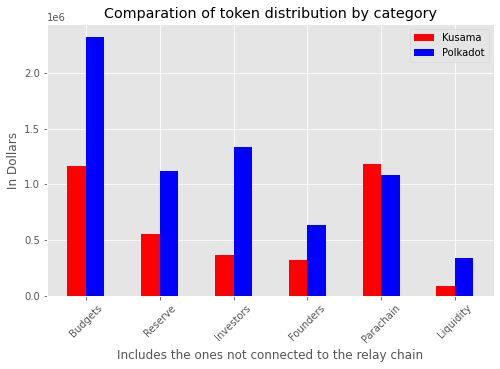

In [208]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, categorized_token_kusama_df.loc[:,categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, categorized_token_polkadot_df.loc[:,categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

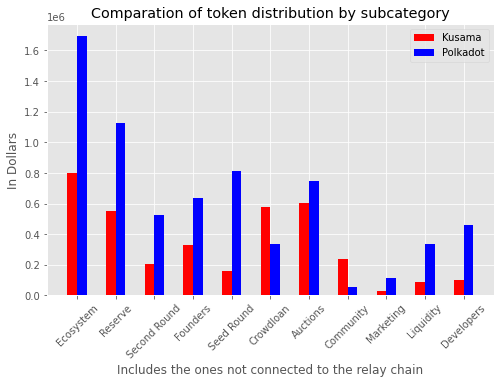

In [209]:
labels = categories["Subcategory"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, subcategories_token_kusama_df.loc[:, subcategories_token_kusama_df.columns!='Total' ].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, subcategories_token_polkadot_df.loc[:, subcategories_token_polkadot_df.columns!='Total' ].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by subcategory')
plt.ylabel('In Dollars')
plt.xlabel("Includes the ones not connected to the relay chain")
plt.legend()

plt.show()

In [210]:
conn_categorized_token_kusama_df = categorized_token_kusama_df[categorized_token_kusama_df["Total"] > 0]
conn_categorized_token_polkadot_df = categorized_token_polkadot_df[categorized_token_polkadot_df["Total"] > 0]

conn_subcategories_token_kusama_df = subcategories_token_kusama_df[subcategories_token_kusama_df["Total"] > 0]
conn_subcategories_token_polkadot_df = subcategories_token_polkadot_df[subcategories_token_polkadot_df["Total"] > 0]

## Excluding unconnected tokens

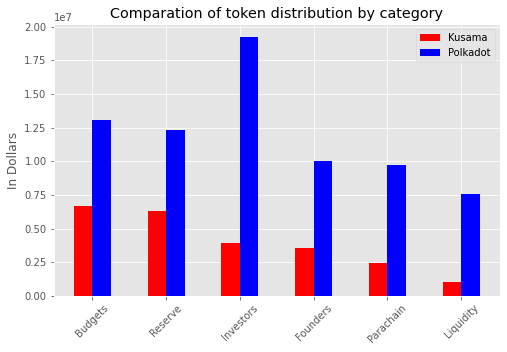

In [211]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')
plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Investors"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Kusama: {int(conn_categorized_token_kusama_df["Founders"].mean())}\nPolkadot: {int(conn_categorized_token_polkadot_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

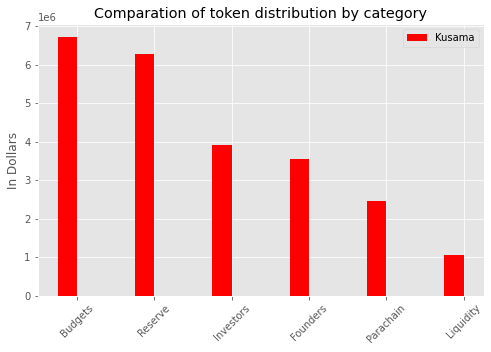

In [212]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals - width/2, conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].mean(numeric_only=True), color = 'r', width = width,  label='Kusama')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()

# plt.annotate(f'Investors: {int(conn_categorized_token_kusama_df["Investors"].mean())}', xy=(2,4), xycoords='data',
#             xytext=(10,200), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))


# plt.annotate(f'Founders: {int(conn_categorized_token_kusama_df["Founders"].mean())}', xy=(3,4), xycoords='data',
#             xytext=(10,150), textcoords='offset points',
#             arrowprops=dict(arrowstyle='fancy',fc='0.9',
#                             connectionstyle="angle3,angleA=180,angleB=90"))

plt.show()

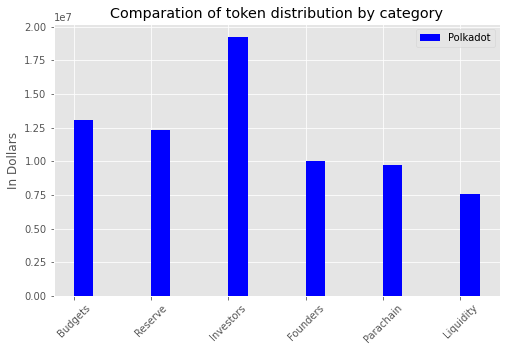

In [213]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.bar(x_vals + width/2, conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].mean(numeric_only=True), color = 'b', width = width,  label='Polkadot')

plt.xticks( x_vals , labels, rotation=45 )
plt.title('Comparation of token distribution by category')
plt.ylabel('In Dollars')
plt.legend()


plt.show()

## Pie chart

## For categories

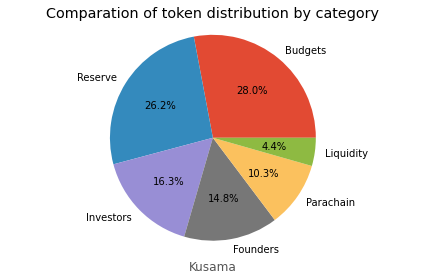

In [214]:
total_conn_categorized_token_kusama_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_kusama_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Comparation of token distribution by category')
plt.xlabel(f'Kusama')
plt.tight_layout()


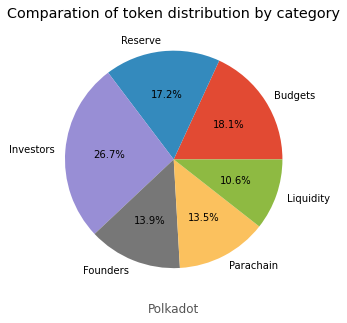

In [215]:
labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.figure(figsize=(8,5))  

plt.pie(conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')
plt.title('Comparation of token distribution by category')

plt.xlabel(f'Polkadot')


plt.show()

## Subcategories

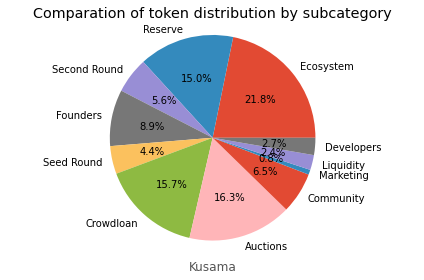

In [216]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<11) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Kusama')
plt.tight_layout()

plt.show()

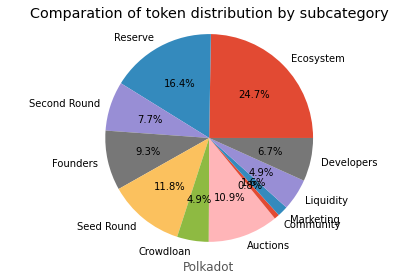

In [217]:
total_conn_subcategories_token_df = conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.xlabel(f'Polkadot')
plt.tight_layout()

plt.show()

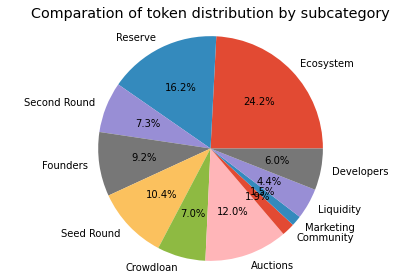

In [218]:
total_conn_subcategories_token_df = conn_subcategories_token_kusama_df.loc[:,conn_subcategories_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_subcategories_token_df += conn_subcategories_token_polkadot_df.loc[:,conn_subcategories_token_polkadot_df.columns!='Total'].sum(numeric_only=True)

dic = total_conn_subcategories_token_df.to_dict()

newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax.axis('equal')
plt.title('Comparation of token distribution by subcategory')
plt.tight_layout()

plt.show()

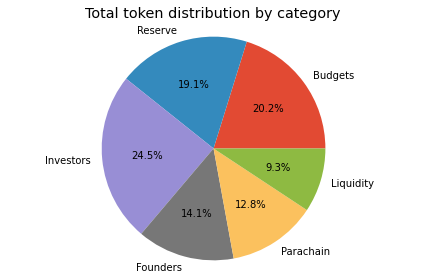

In [219]:
total_conn_categorized_token_df = conn_categorized_token_kusama_df.loc[:,conn_categorized_token_kusama_df.columns!='Total'].sum(numeric_only=True)
total_conn_categorized_token_df += conn_categorized_token_polkadot_df.loc[:,conn_categorized_token_polkadot_df.columns!='Total'].sum(numeric_only=True)


dic = total_conn_categorized_token_df.to_dict()
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<1) else k):
     newdic[key] = sum([dic[k] for k in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
plt.title(f'Total token distribution by category')
plt.tight_layout()

plt.show()




# By Chain
    

In [220]:
df_by_name = subcategories_token_df[subcategories_token_df['name'] == 'Acala']

# total_conn_subcategories_token_by_name_df = df_by_name.sum(numeric_only=True)


# dic = total_conn_subcategories_token_by_name_df.to_dict()

# newdic={}
# for key, group in itertools.groupby(dic, lambda k: 'All the rest' if (dic[k]<31962292898) else k):
#      newdic[key] = sum([dic[k] for k in list(group)])   

# labels = newdic.keys()
# sizes = newdic.values()

# fig, ax = plt.subplots()

# ax.pie(sizes, labels=labels, autopct='%1.1f%%', explode=(0,0,0,0,0,.1,0,0), startangle=0)
# ax.axis('equal')
# plt.title('Comparation of token distribution by subcategory')
# plt.tight_layout()

# plt.show()

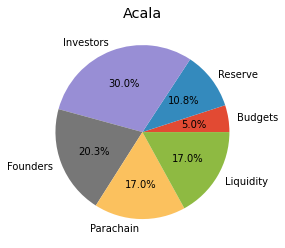

/home/erick/hashed/hashed-genesis-token-distribution-scraping/venv/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3050: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

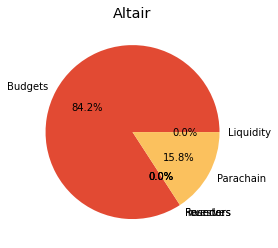

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

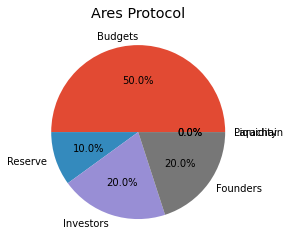

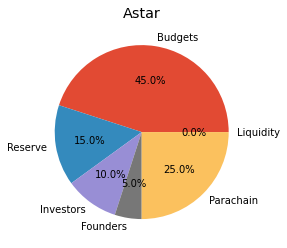

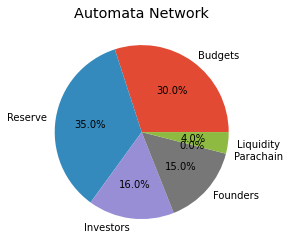

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

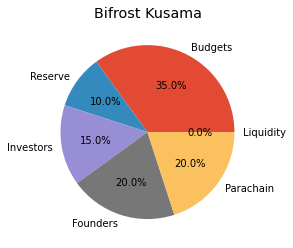

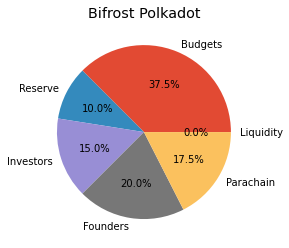

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

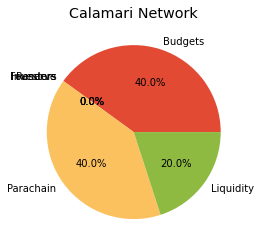

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

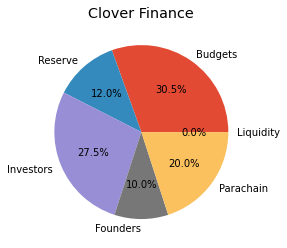

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

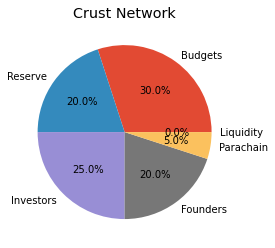

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

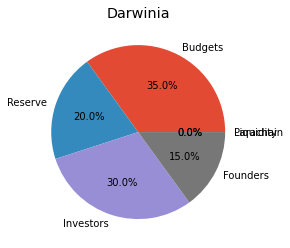

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

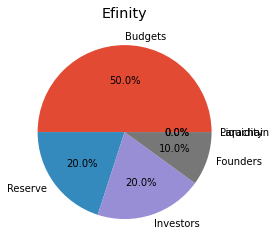

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

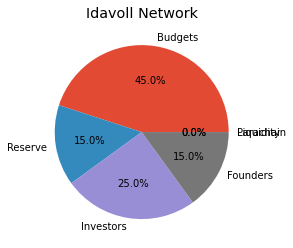

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

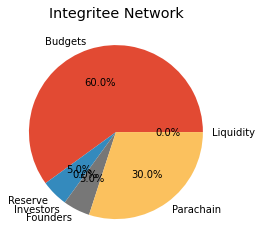

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

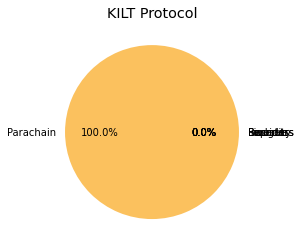

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

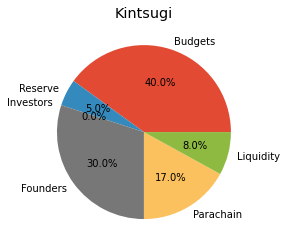

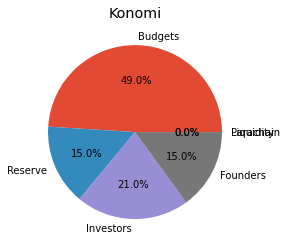

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

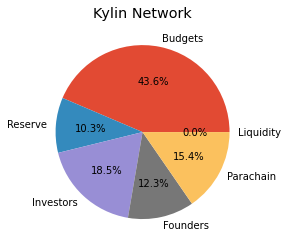

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

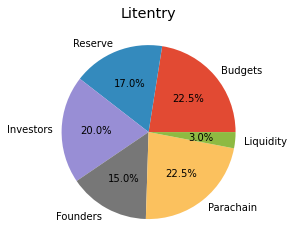

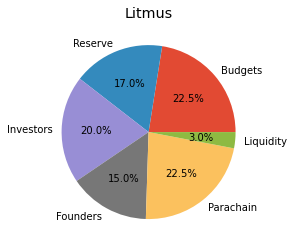

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

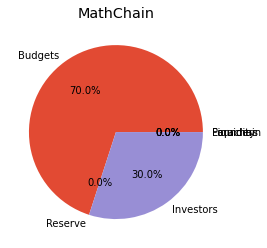

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

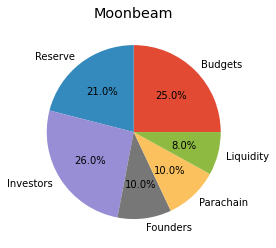

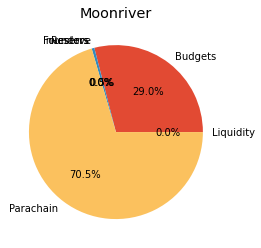

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

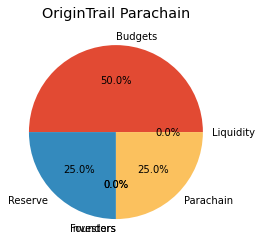

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

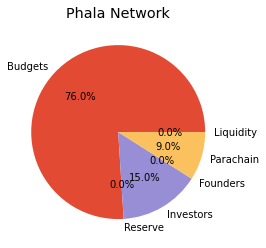

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

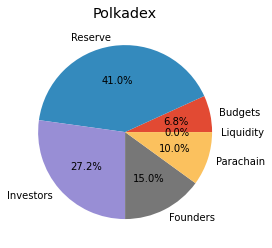

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

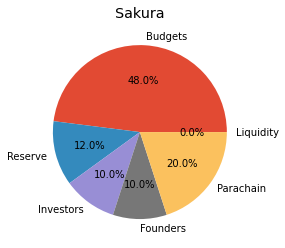

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

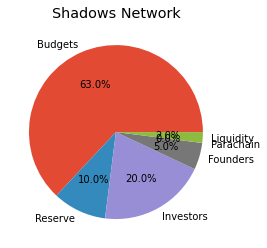

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

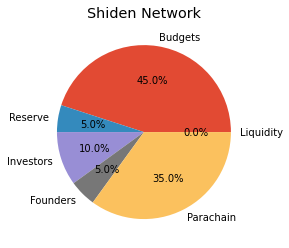

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

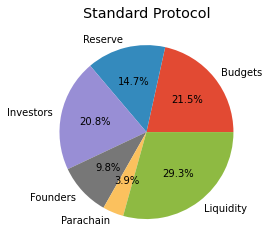

/tmp/ipykernel_50848/2679949549.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [221]:
categorized_token_df

labels = categories["Category"].unique()
width = 0.25
x_vals = np.arange(len(labels))

plt.style.use('ggplot')

for i, group in categorized_token_df.groupby("name"):
    try:
        plt.figure()
        plt.pie(group.loc[:,group.columns!='Total'].sum(numeric_only=True), labels = labels, autopct='%1.1f%%')

        plt.gca().set_aspect('equal', adjustable='box')
        
        plt.title(f'{i}')
        plt.show()
        
    except:
        continue